# Image generation with Craiyon
Demonstration of retrieving images from the Craiyon text-to-image model, freely available at: https://craiyon.com/

This interface enables programatic access to a powerful text-to-image generation model. I plan to use an implementation like this for developing "bots" in a Streamlit version of Telestrations, like [Drawphone](https://drawphone.tannerkrewson.com/).

In [27]:
from io import BytesIO  # work with binary files (images)
import time  # time code execution


import matplotlib.pyplot as plt  # display images
from PIL import Image  # load images, specifically the webp format used by Craiyon
import requests  # send and receive data over HTTP

PROMPT = "tree next to a barn, simple whiteboard drawing"

Running model to produce images for the prompt
tree next to a barn, simple whiteboard drawing
Run time: 0m 58.5s
Run time: 0m 9.3s


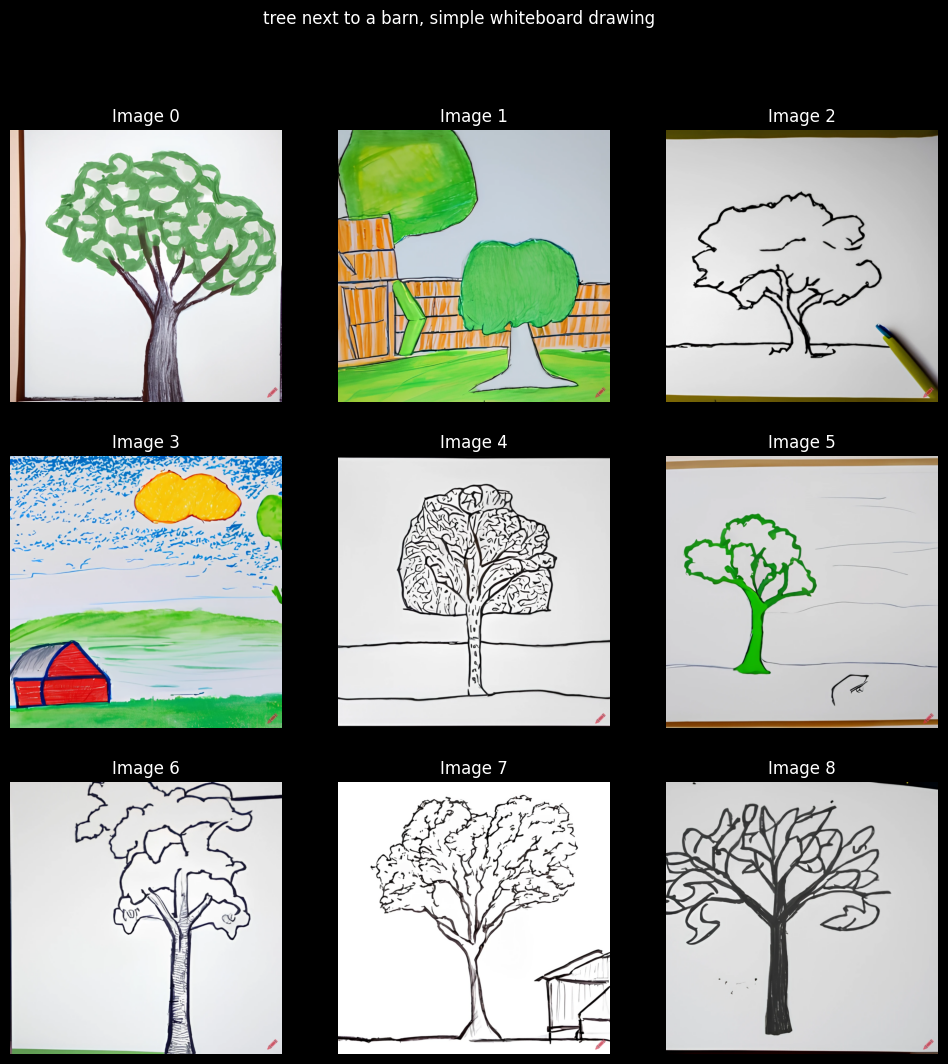

In [32]:
url = 'https://api.craiyon.com/draw'

headers = {
    'accept': 'application/json',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'content-length': '101',
    'content-type': 'application/json',
    'origin': 'https://www.craiyon.com',
    'sec-ch-ua': '"Not_A Brand";v="99", "Google Chrome";v="109", "Chromium";v="109"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': "Windows",
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

payload = {
    'prompt': PROMPT,
    'token': None,
    'version': "35s5hfwn9n78gb06"
}

# Instruct the Craiyon servers to generate images based on a prompt
print(f"Running model to produce images for the prompt:\n'{PROMPT}'")
t0 = time.perf_counter()
r = requests.post(url=url, headers=headers, json=payload, timeout=120)
t1 = time.perf_counter() - t0
print(f"Run time: {t1 // 60:,.0f}m {t1 % 60:.1f}s")

# Collect the URLs for the 9 returned images
# This is a list of partial URLs in this format:
# '2023-02-11/d38726731fb04203876d633e283f0353.webp'
# That string is added to the end of a URL to retrieve the image:
# 'https://img.craiyon.com/2023-02-11/d38726731fb04203876d633e283f0353.webp'
image_urls = r.json()['images']

print("Downloading and displaying images...")
t0 = time.perf_counter()
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
plt.suptitle(PROMPT)
for i, ax in enumerate(axs.flatten()):
    # Download the image
    r_img = requests.get(f"https://img.craiyon.com/{image_urls[i]}")
    # Reference: https://requests.readthedocs.io/en/latest/user/quickstart/#binary-response-content
    img = Image.open(BytesIO(r_img.content))
    ax.imshow(img)
    ax.set_title(f"Image {i}")
    ax.set_axis_off()
t1 = time.perf_counter() - t0
print(f"Run time: {t1 // 60:,.0f}m {ts1 % 60:.1f}s")
# plt.tight_layout()